In [17]:
# importing neccessary libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC



In [18]:
# loading the wine dataset
wine = load_wine()
X = pd.DataFrame(wine.data, columns=wine.feature_names)
y = pd.Series(wine.target, name='target')

# checking the dataset shape
print("Shape of features:", X.shape)
print("Target classes:", np.unique(y))
X.head()


Shape of features: (178, 13)
Target classes: [0 1 2]


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


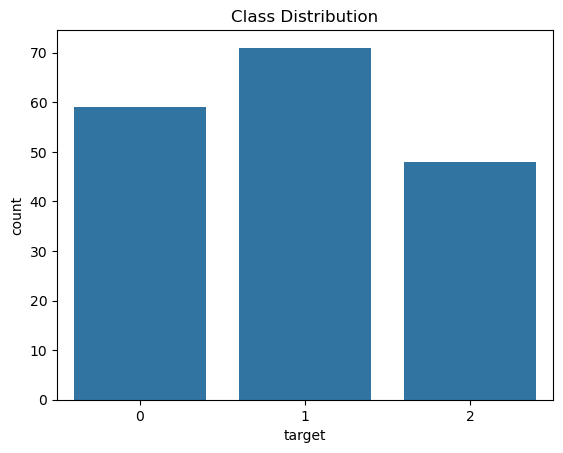

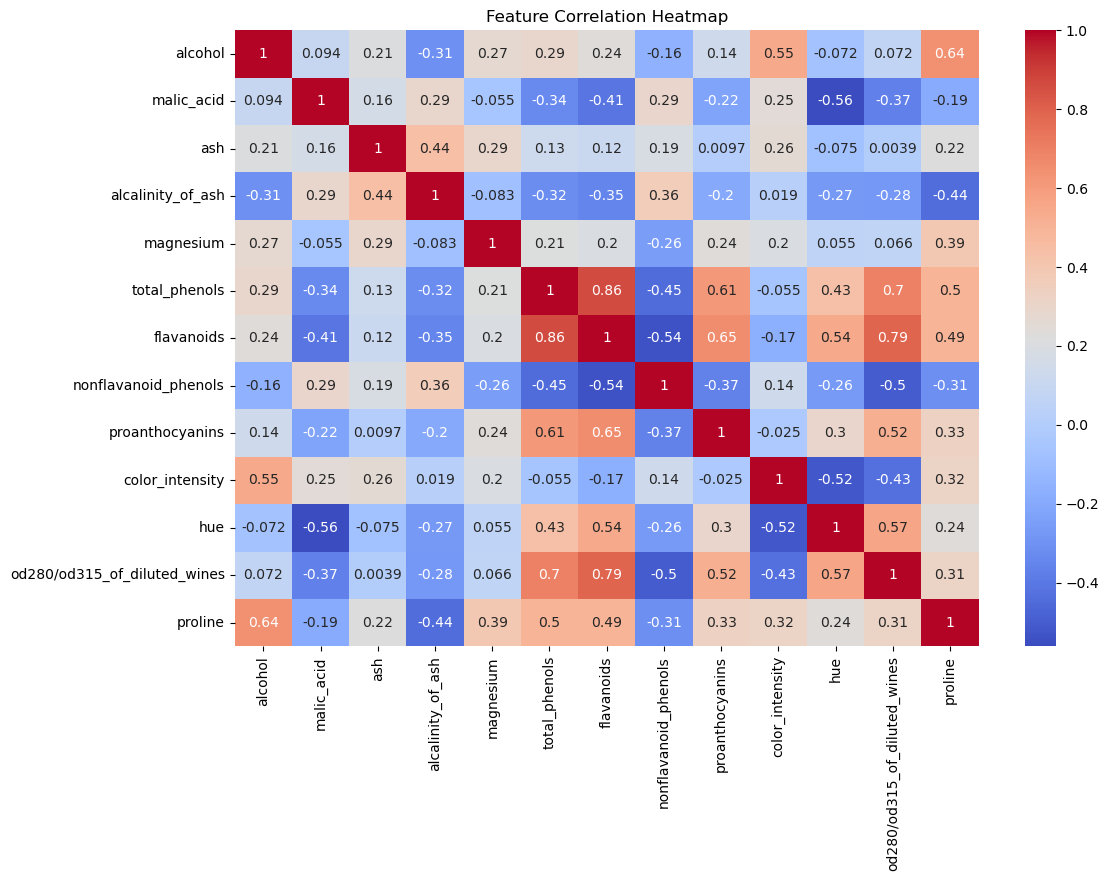

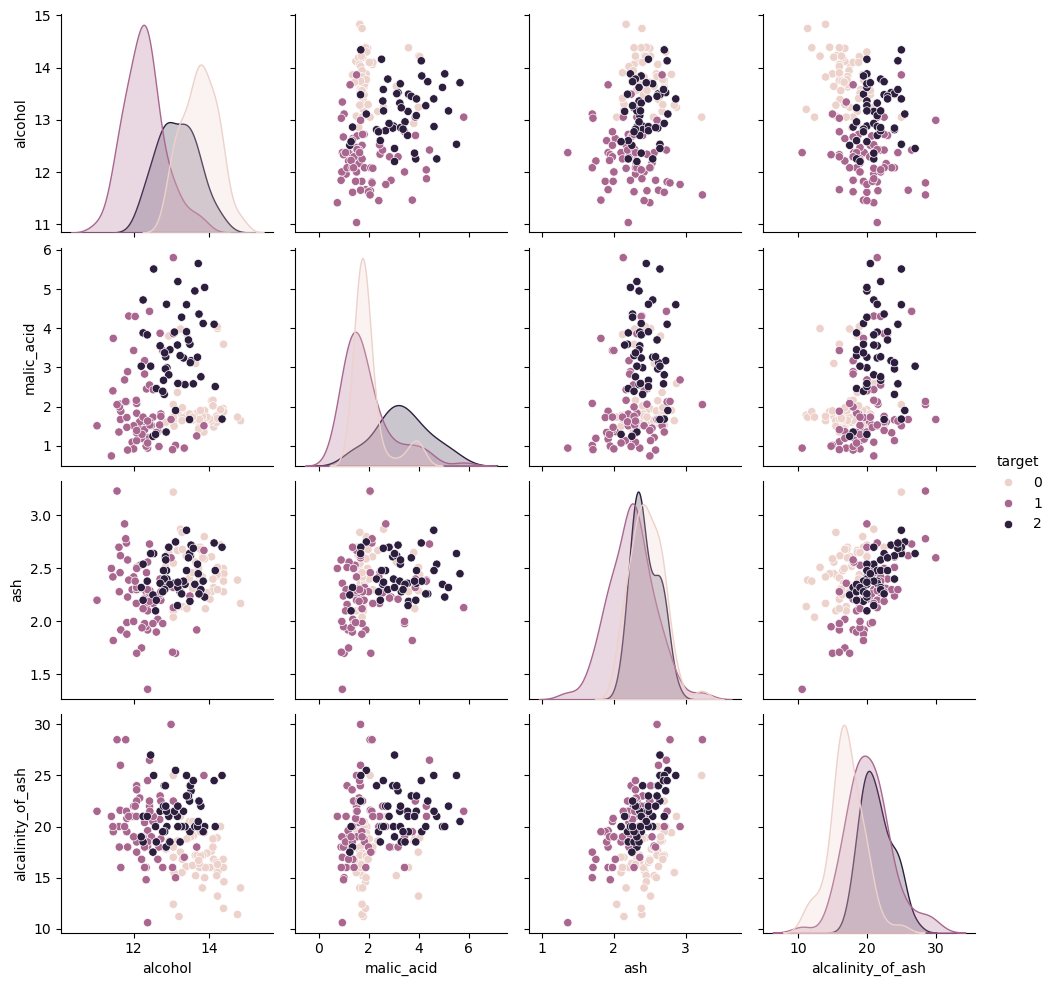

In [19]:
# Class distribution
sns.countplot(x=y)
plt.title("Class Distribution")
plt.show()

# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(X.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

# Pairplot (optional subset)
sns.pairplot(pd.concat([X.iloc[:, :4], y], axis=1), hue="target")
plt.show()


In [20]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train/Test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)


In [21]:
def plot_conf_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=wine.target_names, yticklabels=wine.target_names)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix: {title}')
    plt.show()


In [22]:
results = pd.DataFrame(columns=['Model', 'Accuracy'])

def evaluate_model(name, model):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"🔍 {name}\n", classification_report(y_test, y_pred))
    plot_conf_matrix(y_test, y_pred, name)
    results.loc[len(results)] = [name, acc]


# Logistics regression

🔍 Logistic Regression
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.95      0.98        21
           2       0.93      1.00      0.97        14

    accuracy                           0.98        54
   macro avg       0.98      0.98      0.98        54
weighted avg       0.98      0.98      0.98        54



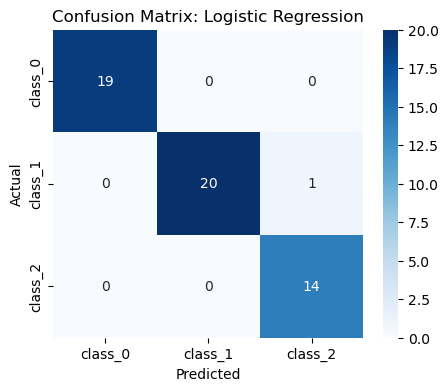

In [23]:
evaluate_model("Logistic Regression", LogisticRegression(max_iter=1000))


# Desicion trees

🔍 Decision Tree
               precision    recall  f1-score   support

           0       1.00      0.89      0.94        19
           1       0.88      1.00      0.93        21
           2       1.00      0.93      0.96        14

    accuracy                           0.94        54
   macro avg       0.96      0.94      0.95        54
weighted avg       0.95      0.94      0.94        54



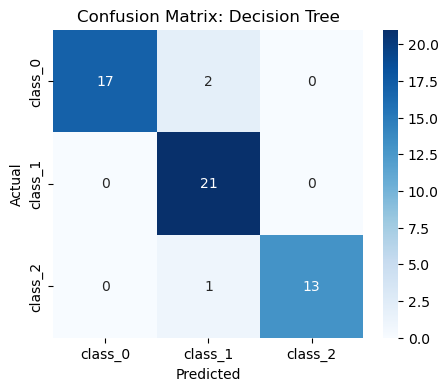

In [24]:
evaluate_model("Decision Tree", DecisionTreeClassifier())


# randomforest

🔍 Random Forest
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        21
           2       1.00      1.00      1.00        14

    accuracy                           1.00        54
   macro avg       1.00      1.00      1.00        54
weighted avg       1.00      1.00      1.00        54



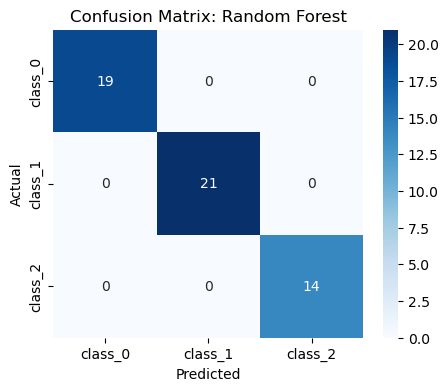

In [25]:

evaluate_model("Random Forest", RandomForestClassifier(n_estimators=100))


# k-Nearest Neighbors (KNN)

🔍 KNN
               precision    recall  f1-score   support

           0       0.95      1.00      0.97        19
           1       1.00      0.90      0.95        21
           2       0.93      1.00      0.97        14

    accuracy                           0.96        54
   macro avg       0.96      0.97      0.96        54
weighted avg       0.97      0.96      0.96        54



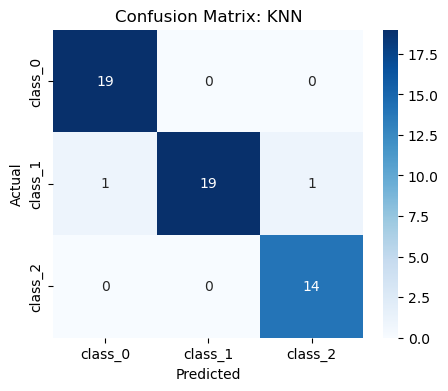

In [26]:
evaluate_model("KNN", KNeighborsClassifier(n_neighbors=5))


# Naive Bayes

🔍 Naive Bayes
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        21
           2       1.00      1.00      1.00        14

    accuracy                           1.00        54
   macro avg       1.00      1.00      1.00        54
weighted avg       1.00      1.00      1.00        54



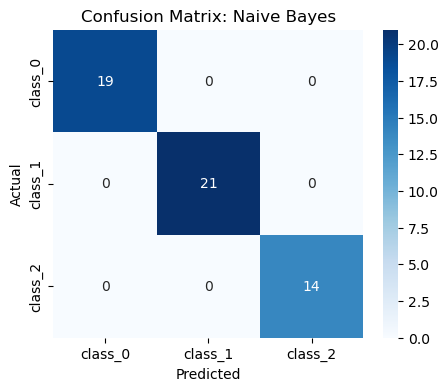

In [27]:
evaluate_model("Naive Bayes", GaussianNB())


#  Support Vector Machine (SVM)

🔍 SVM
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.95      0.98        21
           2       0.93      1.00      0.97        14

    accuracy                           0.98        54
   macro avg       0.98      0.98      0.98        54
weighted avg       0.98      0.98      0.98        54



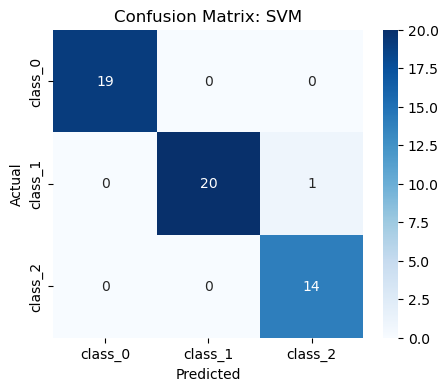

In [28]:
evaluate_model("SVM", SVC(kernel='linear'))


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_13364\1156189059.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=results, x='Accuracy', y='Model', palette='Set2')


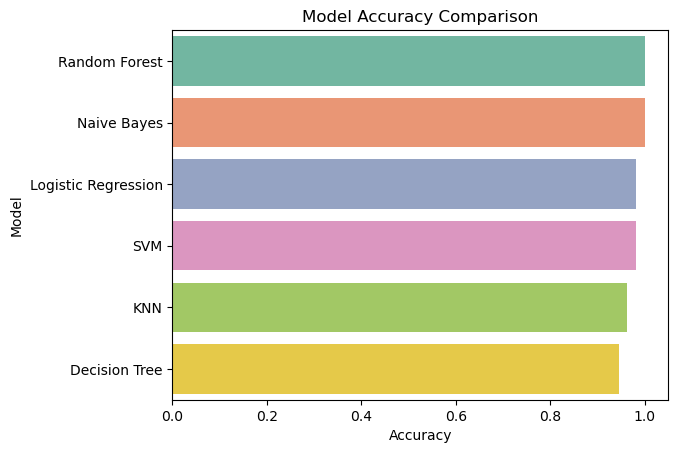

,Model,Accuracy
2,Random Forest,1.000000
4,Naive Bayes,1.000000
0,Logistic Regression,0.981481
5,SVM,0.981481
3,KNN,0.962963
1,Decision Tree,0.944444


In [29]:
# Compare Model Performance
results.sort_values(by='Accuracy', ascending=False, inplace=True)
sns.barplot(data=results, x='Accuracy', y='Model', palette='Set2')
plt.title("Model Accuracy Comparison")
plt.show()

results


 # Conclusion

* After evaluating all models, Random Forest achieved the highest accuracy with strong precision and recall across all classes. It performed better due to its ensemble nature, reducing overfitting and capturing complex patterns. Logistic Regression and SVM also performed well. Naive Bayes, although simple, was surprisingly effective. Decision Tree and KNN had decent performance but showed more variance. Based on these results, Random Forest is the most reliable choice for this dataset.

